# **LAB 5 - PART 1 Classification model (NN,CNN,LSTM) with Time Series Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from keras import Model, Input
from keras.models import Sequential
from keras.layers import Conv2D, LSTM, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

import glob
from scipy import stats
import datetime as dt
from tqdm import tqdm

C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\1229842120.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **Data Preparation**

**Load csv from txt files**

**- Load Acceleration**

In [2]:
# Get filename of Acceleration
user1 = "781756"
user2 = "844359"
### START CODE HERE ###
fnames_ACC = glob.glob(f"./{user1}_acceleration.txt")
fnames2_ACC = glob.glob(f"./{user2}_acceleration.txt")

testers_ACC = []
# Read CSV files

for f in tqdm(fnames_ACC):
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'accX', 'accY', 'accZ'])
  testers_ACC.append(tester)
for f in tqdm(fnames2_ACC):
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'accX', 'accY', 'accZ'])
  testers_ACC.append(tester)
  
print(testers_ACC)
ACC = pd.concat(testers_ACC)

### END CODE HERE ###

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\2748114814.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'accX', 'accY', 'accZ'])
  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\2748114814.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'accX', 'accY', 'accZ'])
100%|██████████| 1/1 [00:05<00:00,  5.52s/it]

[            timedelta      accX      accY      accZ
0       -12456.814733  0.260346 -0.222687 -0.939560
1       -12456.795310  0.280960 -0.214783 -0.933167
2       -12456.774080  0.275482 -0.249451 -0.906189
3       -12456.755424  0.287628 -0.247787 -0.881287
4       -12456.735441  0.302216 -0.244110 -0.850540
...               ...       ...       ...       ...
1566995  37458.780511 -0.481201 -0.329498 -0.999710
1566996  37458.799774 -0.631622 -0.308197 -0.840958
1566997  37458.819445 -0.726898 -0.174835 -0.739563
1566998  37458.838677 -0.728760  0.052200 -0.852509
1566999  37458.858389 -0.752991  0.188599 -1.066315

[1567000 rows x 4 columns],             timedelta      accX      accY      accZ
0         -500.492604 -0.023804 -0.535217 -0.832169
1         -500.474720 -0.015472 -0.535690 -0.833450
2         -500.455065 -0.019379 -0.528381 -0.834518
3         -500.434675 -0.013473 -0.531311 -0.836334
4         -500.414981 -0.015366 -0.533752 -0.839294
...               ...       ...   

In [3]:
ACC

,timedelta,accX,accY,accZ
0,-12456.814733,0.260346,-0.222687,-0.939560
1,-12456.795310,0.280960,-0.214783,-0.933167
2,-12456.774080,0.275482,-0.249451,-0.906189
3,-12456.755424,0.287628,-0.247787,-0.881287
4,-12456.735441,0.302216,-0.244110,-0.850540
...,...,...,...,...
1455995,28828.068306,0.509995,0.462479,-0.559250
1455996,28828.089226,0.465301,0.612167,-0.612411
1455997,28828.109608,0.429871,0.622650,-0.694794
1455998,28828.128373,0.506653,0.607361,-0.815720


**- Load Heart Rate**

In [4]:
# Get filename of Heart Rate

### START CODE HERE ###
fnames_HR = glob.glob(f"./{user1}_heartrate.txt")
fnames2_HR = glob.glob(f"./{user2}_heartrate.txt")

testers_HR = []
# Read CSV files
for f in tqdm(fnames_HR):
    tester = pd.read_csv(f, sep=None, names=['timedelta', 'heartrate'])
    testers_HR.append(tester)
for f in tqdm(fnames2_HR):
    tester = pd.read_csv(f, sep=None, names=['timedelta', 'heartrate'])
    testers_HR.append(tester)

HeartR = pd.concat(testers_HR)

### END CODE HERE ###

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\871376079.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'heartrate'])
  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\871376079.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'heartrate'])
100%|██████████| 1/1 [00:00<00:00, 34.36it/s]


In [5]:
HeartR

,timedelta,heartrate
0,-14430.51515,88
1,-14190.01591,68
2,-13994.51590,73
3,-13527.14215,89
4,-13230.26740,82
...,...,...
7151,28831.97095,80
7152,28840.97095,81
7153,28842.97095,80
7154,28852.97092,82


**- Load Labeled Sleep**

In [6]:
# Get filename of Heart Rate

### START CODE HERE ###
fnames_LS = glob.glob(f"./{user1}_labeled_sleep.txt")
fname2_LS = glob.glob(f"./{user2}_labeled_sleep.txt")

testers_LS = []
# Read CSV files
for f in tqdm(fnames_LS):
    tester = pd.read_csv(f, sep=None, names=['timedelta', 'sleep'])
    testers_LS.append(tester)
for f in tqdm(fname2_LS):
    tester = pd.read_csv(f, sep=None, names=['timedelta', 'sleep'])
    testers_LS.append(tester)

SleepL = pd.concat(testers_LS)

### END CODE HERE ###

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\1228256065.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'sleep'])
  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\1228256065.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  tester = pd.read_csv(f, sep=None, names=['timedelta', 'sleep'])
100%|██████████| 1/1 [00:00<00:00, 77.09it/s]


**- If some Sleep levels are negative (-1) -> SleepL += 1**

In [7]:
SleepL.loc[SleepL['sleep'] < 0, 'sleep'] += 1

SleepL

,timedelta,sleep
0,0,0
1,30,0
2,60,0
3,90,0
4,120,0
...,...,...
944,28320,0
945,28350,0
946,28380,0
947,28410,0


**Synchronizes 'ACC', 'HeartR', 'SleepL'** by aligning their time ranges, <br>
and then filters each dataset to only include data within the overlapping time range.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

<br> ACC start: -124489.16105       ACC end: 37458.8583889
<br> HeartR start: -604720.29398    HeartR end: 37541.70998 
<br> SleepL start: 0                SleepL end: 29400 


In [8]:
### START CODE HERE ###

#Find max, min timedelta to find intersection time 
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()

HeartR_max_date = HeartR['timedelta'].max() 
HeartR_min_date = HeartR['timedelta'].min()

SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_data = SleepL['timedelta'].min()

# Obtain data for ACC, HeartR, and SleepL exclusively during the intersection period.
print(f'ACC start: {ACC_min_date}, end: {ACC_max_date}')
print(f'HeartR start: {HeartR_min_date}, end: {HeartR_max_date}')
print(f'SleepL start: {SleepL_min_data}, end: {SleepL_max_date}')
### END CODE HERE ###

ACC start: -12456.814733, end: 37458.8583889
HeartR start: -604720.29398, end: 37541.70998
SleepL start: 0, end: 29400


If your code is correct, this cell will execute without any issues.

In [9]:
# print(ACC.shape)
# print(HeartR.shape)
# print(SleepL.shape)
# assert ACC.shape == (4863482, 4)
# assert HeartR.shape == (28655, 2)
# assert SleepL.shape == (2967, 2)

Converts the `'timedelta'` column of the `ACC` DataFrame to a `pandas Timedelta object` in seconds and rounds it to the nearest second.

In [10]:
### START CODE HERE ###
timedelta_unit = 's'  # Define the timedelta_unit variable
resample_rule = '1s'
ACC['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC['timedelta'], unit=timedelta_unit).round(resample_rule))
ACC['timedelta'] = ACC['timedelta'].dt.floor('1s')
### END CODE HERE ###
ACC

,timedelta,accX,accY,accZ
0,-1 days +20:32:23,0.260346,-0.222687,-0.939560
1,-1 days +20:32:23,0.280960,-0.214783,-0.933167
2,-1 days +20:32:23,0.275482,-0.249451,-0.906189
3,-1 days +20:32:23,0.287628,-0.247787,-0.881287
4,-1 days +20:32:23,0.302216,-0.244110,-0.850540
...,...,...,...,...
1455995,0 days 08:00:28,0.509995,0.462479,-0.559250
1455996,0 days 08:00:28,0.465301,0.612167,-0.612411
1455997,0 days 08:00:28,0.429871,0.622650,-0.694794
1455998,0 days 08:00:28,0.506653,0.607361,-0.815720


Groups the `ACC` DataFrame by `'timedelta'`, calculates the mean of `'accX', 'accY', and 'accZ'` for each group, and then concatenates these averages into a new DataFrame.

In [11]:
### START CODE HERE ###
df_acc = ACC.groupby('timedelta').mean().reset_index()
ACC = df_acc
### END CODE HERE ###
ACC

,timedelta,accX,accY,accZ
0,-1 days +20:32:23,0.291846,-0.092610,-0.950061
1,-1 days +20:32:24,0.301344,-0.026274,-0.952462
2,-1 days +20:32:25,0.302818,-0.025030,-0.951109
3,-1 days +20:32:26,0.301760,-0.021396,-0.951487
4,-1 days +20:32:27,0.305291,-0.023368,-0.950431
...,...,...,...,...
31376,0 days 10:23:52,0.536844,0.707531,0.350590
31377,0 days 10:23:53,0.697099,0.501642,-0.342189
31378,0 days 10:23:54,0.609318,0.489413,0.624249
31379,0 days 10:23:55,0.724558,0.319705,-0.398449


Converts the `'timedelta'` column of the `HeartR` DataFrame to a `pandas Timedelta object` in seconds, rounds it to the nearest second, sets it as the index, resamples the DataFrame to 1-second intervals using median as the aggregation function, and forward fills any missing values.

In [12]:
### START CODE HERE ###
timedelta_unit = 's'  # Define the timedelta_unit variable
resample_rule = '1s'
HeartR['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR['timedelta'], unit=timedelta_unit).round(resample_rule))
HeartR = HeartR.set_index('timedelta').resample(resample_rule).median().ffill()
### END CODE HERE ###
HeartR

,heartrate
timedelta,
-7 days +00:01:19.706020,68.0
-7 days +00:01:20.706020,68.0
-7 days +00:01:21.706020,68.0
-7 days +00:01:22.706020,68.0
-7 days +00:01:23.706020,68.0
...,...
0 days 10:25:37.706020,78.0
0 days 10:25:38.706020,78.0
0 days 10:25:39.706020,78.0


Converts the `'timedelta'` column of the `SleepL` DataFrame to a `pandas Timedelta object` in seconds, rounds it to the nearest second, sets it as the index, resamples the DataFrame to 1-second intervals using median as the aggregation function, and forward fills any missing values.

In [13]:
### START CODE HERE ###
timedelta_unit = 's'  # Define the timedelta_unit variable
SleepL['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL['timedelta'], unit=timedelta_unit).round(resample_rule))
resample_rule = '1s'
SleepL = SleepL.set_index('timedelta').resample(resample_rule).median().ffill()
### END CODE HERE ###


Merges the `ACC, HeartR, and SleepL` DataFrames into a single DataFrame df, aligning them based on their `'timedelta'` columns using an asof merge.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
	      timedelta	   accX	      accY	       accZ	  heartrate	sleep
0	0 days 00:00:00	-0.143596	0.434711	-0.558406	NaN	NaN
1	0 days 00:00:01	-0.184721	0.438487	-0.492099	NaN	NaN
2	0 days 00:00:02	-0.213871	0.403676	-0.476563	65.0	NaN
3	0 days 00:00:03	-0.176616	0.391760	-0.571252	65.0	NaN
4	0 days 00:00:04	0.072789	0.338097	-0.571049	65.0	NaN

```

In [14]:
## START CODE HERE ###
df = pd.merge_asof(ACC, HeartR, on='timedelta')
df = pd.merge_asof(df, SleepL, on ='timedelta')
### END CODE HERE ###

df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-1 days +20:32:23,0.291846,-0.092610,-0.950061,90.0,NaN
1,-1 days +20:32:24,0.301344,-0.026274,-0.952462,90.0,NaN
2,-1 days +20:32:25,0.302818,-0.025030,-0.951109,90.0,NaN
3,-1 days +20:32:26,0.301760,-0.021396,-0.951487,90.0,NaN
4,-1 days +20:32:27,0.305291,-0.023368,-0.950431,90.0,NaN
...,...,...,...,...,...,...
31376,0 days 10:23:52,0.536844,0.707531,0.350590,78.0,5.0
31377,0 days 10:23:53,0.697099,0.501642,-0.342189,78.0,5.0
31378,0 days 10:23:54,0.609318,0.489413,0.624249,78.0,5.0
31379,0 days 10:23:55,0.724558,0.319705,-0.398449,78.0,5.0


Fills missing values in the `'heartrate'` column with the column's median,<br> 
Fills missing values in the `'sleep'` column with 0,<br> 
and then drops the `'timedelta'` column from the df DataFrame.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
	   accX	      accY	      accZ	heartrate	sleep
0	-0.143596	0.434711	-0.558406	62.0	0.0
1	-0.184721	0.438487	-0.492099	62.0	0.0
2	-0.213871	0.403676	-0.476563	65.0	0.0
3	-0.176616	0.391760	-0.571252	65.0	0.0
4	0.072789	0.338097	-0.571049	65.0	0.0
```

In [15]:
### START CODE HERE ###
df['heartrate'].fillna(df['heartrate'].median(), inplace=True)
df['sleep'].fillna(0, inplace=True)
df.drop('timedelta', axis=1, inplace=True)
### END CODE HERE ###
df

C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\2103866066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['heartrate'].fillna(df['heartrate'].median(), inplace=True)
C:\Users\Kolawat\AppData\Local\Temp\ipykernel_21384\2103866066.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,accX,accY,accZ,heartrate,sleep
0,0.291846,-0.092610,-0.950061,90.0,0.0
1,0.301344,-0.026274,-0.952462,90.0,0.0
2,0.302818,-0.025030,-0.951109,90.0,0.0
3,0.301760,-0.021396,-0.951487,90.0,0.0
4,0.305291,-0.023368,-0.950431,90.0,0.0
...,...,...,...,...,...
31376,0.536844,0.707531,0.350590,78.0,5.0
31377,0.697099,0.501642,-0.342189,78.0,5.0
31378,0.609318,0.489413,0.624249,78.0,5.0
31379,0.724558,0.319705,-0.398449,78.0,5.0


1. Separate X input[['accX', 'accY', 'accZ', 'heartrate'] ]and Y output[['sleep']]
2. Perform data scaling using Standardize,<br>
3. Perform SMA: Simple Moving Average to reduce noise in signals ,<br>

In [16]:
### START CODE HERE ###
feature_columns = ['accX', 'accY', 'accZ', 'heartrate']
label_columns = ['sleep']

df_feature = df[feature_columns]
df_label = df[label_columns]

scaler = StandardScaler()
df_feature_standardized = pd.DataFrame(scaler.fit_transform(df_feature), columns=feature_columns)

df_feature_SMA = pd.DataFrame()
wsize = 10
minp = 1
df_feature_SMA['accX'] = df_feature_standardized['accX'].rolling(
    wsize, min_periods=minp).mean()
df_feature_SMA['accY'] = df_feature_standardized['accY'].rolling(
    wsize, min_periods=minp).mean()
df_feature_SMA['accZ'] = df_feature_standardized['accZ'].rolling(
    wsize, min_periods=minp).mean()
df_feature_SMA['heartrate'] = df_feature_standardized['heartrate'].rolling(
    wsize, min_periods=minp).mean()
### END CODE HERE ###

Graph of all signals before and after Standardize and SMA
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

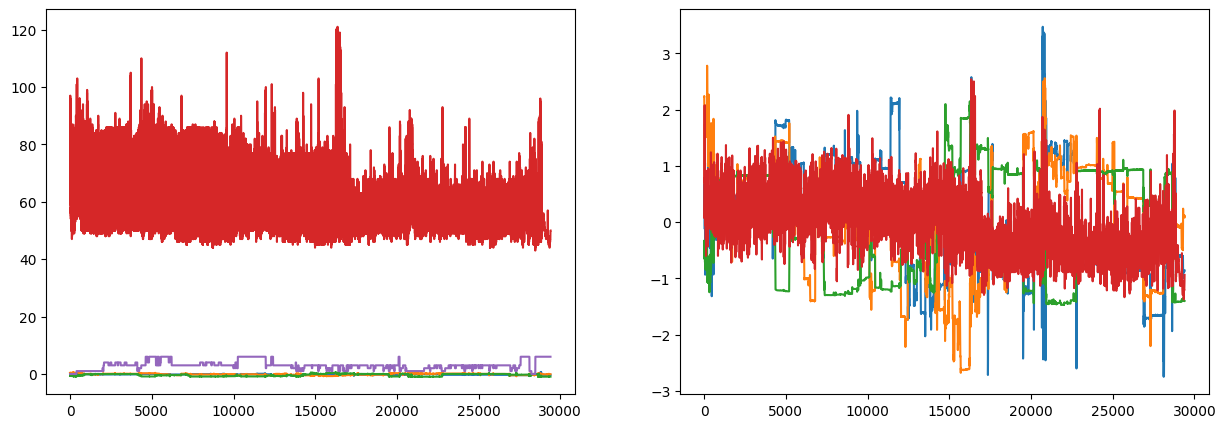

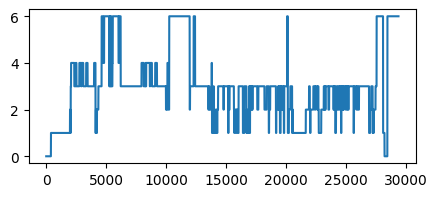

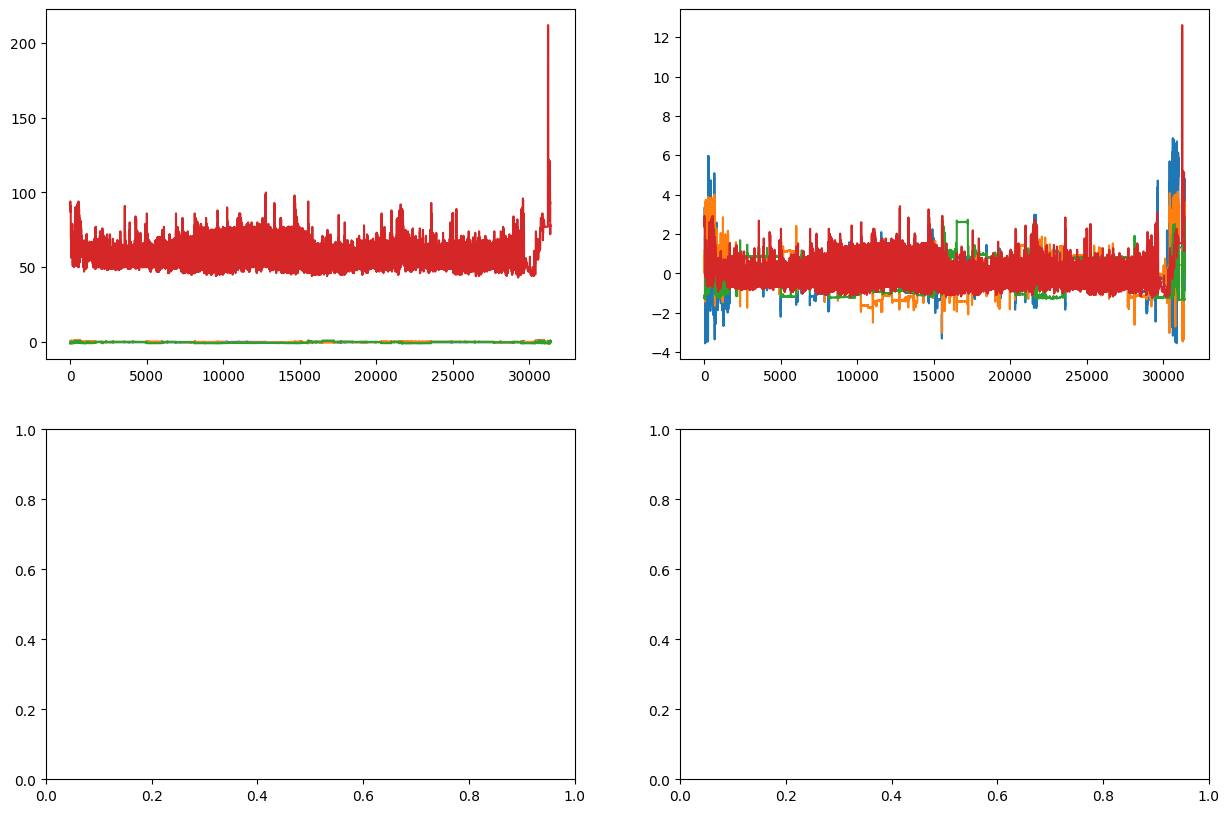

In [17]:
### START CODE HERE ###
# Before Standardize and SMA
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].plot(df_feature)
# After
axs[0][1].plot(df_feature_standardized)
plt.show()
### END CODE HERE ###

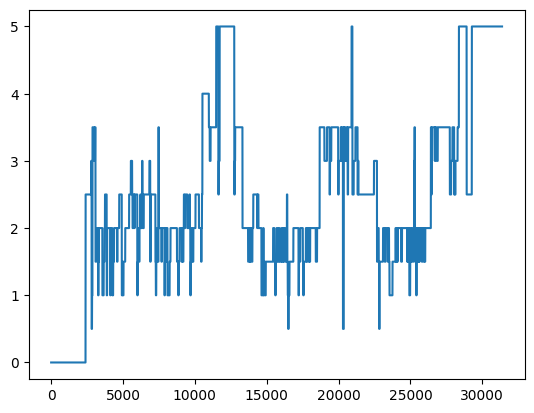

In [18]:
# Graph Sleep labels
plt.plot(df_label)

### **Model Experimentaion**

**Train Test Data Preparation**

In [19]:
X = df_feature_SMA
y = df_label

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

##### **Neural Network**
**Create MLP (NN) Model Architecture**

In [21]:
hiddenL = (50, 50 , 50 )
act = 'relu'
EP = 100
lr = 0.001
optimizer = 'adam'
SEED_init = None
tolr = 1e-4
mlp = MLPClassifier(hidden_layer_sizes=hiddenL,activation='relu' ,max_iter=EP, alpha=lr,solver='adam', random_state=None,tol=tolr)
mlp

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=100)

**Traning MLP (NN) Model**

In [22]:

mlp.fit(x_train, y_train.astype('int'))

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=100)

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```----- Classification Report of MLP NN predict X_test -----
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       192
           1       0.86      0.73      0.79      1246
           2       0.77      0.35      0.48      1224
           3       0.84      0.82      0.83      4153
           4       0.64      0.75      0.69       603
           5       0.88      0.88      0.88      1403

   micro avg       0.83      0.74      0.78      8821
   macro avg       0.80      0.71      0.74      8821
weighted avg       0.82      0.74      0.77      8821
 samples avg       0.73      0.74      0.73      8821
```
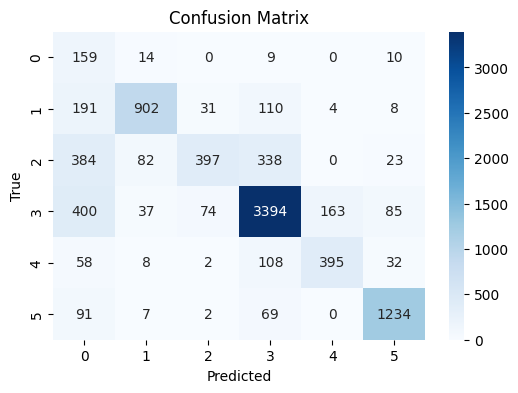

**MLP (NN) Model Prediction**

In [23]:
y_pred = mlp.predict(x_test)
y_pred = y_pred.reshape(-1, 1)

**MLP (NN) Model Performance (Confusion Matrix, Classification_report)**


----- Classification Report of MLP NN predict X_test -----
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       752
           1       0.71      0.67      0.69      1838
           2       0.79      0.82      0.80      3761
           3       0.82      0.82      0.82      1783
           4       0.74      0.87      0.80       127
           5       0.91      0.85      0.88      1154

    accuracy                           0.80      9415
   macro avg       0.80      0.82      0.81      9415
weighted avg       0.80      0.80      0.80      9415

----- Confusion matrix of MLP NN predict X_test -----


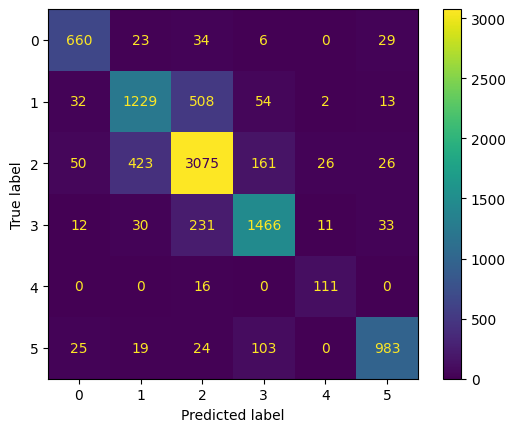

In [24]:

from sklearn.metrics import ConfusionMatrixDisplay
print('----- Classification Report of MLP NN predict X_test -----')
print(classification_report(y_test.astype('int'), y_pred))
print('----- Confusion matrix of MLP NN predict X_test -----')

confusion = confusion_matrix(y_test.astype('int'), y_pred)
ConfusionMatrixDisplay(confusion, display_labels=mlp.classes_).plot()

##### **Train-Test Data Preparation for CNN Training**
1. Non-Transpose Data (XR Shape1: sliding window size, n_feature)
2. Transpose Data  (XT Shape2: n_feature, sliding window size)

**Non-Transpose data (XR)**



In [25]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, 

X = df_feature_SMA

XR = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # sliding window X[i: i+slidingW]
    feature = np.array(df_feature_SMA[i: i+slidingW])
    # Reshape 2D Array to 3D Array with channel last
    featureR = feature.reshape(slidingW, n_feature, 1)  
    # sliding window df_labels[i: i+slidingW]
    label = np.array(df_label[i: i+slidingW])         
    # Majority vote : mode of labels for whole array 
    mode_values, countL = stats.mode(label,axis=None) 
    label = mode_values
    
    XR.append(featureR)
    y.append(label)

XR = np.array(XR)
yR = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yR
y = pd.get_dummies(yR['Sleep_Label'])
yR = y

**Non-Transpose Tran_test_split data**

In [26]:
#----- CNN with XR -----------
#--- Train - Validate - Test ----
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.3,random_state=42)

##### **CNN Architecture (XR)**

In [27]:
CNN_L1 = 32
CNN_L2 = 64
CNN_L3 = 128
Ker_size = (3,3)
Act_func = "relu"
Dense_size = 512
Nclass = yR.shape

pDrop = 0.4

Input_shape = (slidingW, n_feature, 1)
P_size = (2,1)

model = Sequential()
model.add(Conv2D(CNN_L1, kernel_size=Ker_size, activation=Act_func, input_shape=Input_shape, padding='same'))   
model.add(MaxPooling2D(pool_size=P_size))
model.add(Dropout(pDrop))

model.add(Conv2D(CNN_L2, kernel_size=Ker_size, activation=Act_func, padding='same'))
model.add(MaxPooling2D(pool_size=P_size))
model.add(Dropout(pDrop))

model.add(Conv2D(CNN_L3, kernel_size=Ker_size, activation=Act_func, padding='same'))
model.add(MaxPooling2D(pool_size=P_size))
model.add(Dropout(pDrop))

model.add(Flatten())
model.add(Dense(Dense_size, activation=Act_func))
model.add(Dense(Nclass[1], activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss= tf.keras.losses.categorical_crossentropy,
            metrics=["acc"])
model.summary()

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 4, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 4, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 4, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 4, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 4, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 4, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 4, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6144)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,146,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,244,042 (12.38 MB)

 Trainable params: 3,244,042 (12.38 MB)

 Non-trainable params: 0 (0.00 B)

##### **Train CNN(XR)**

In [28]:
historyXR = model.fit(XR_train, yR_train, epochs=300, batch_size=400, validation_data=(XR_test, yR_test))

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - acc: 0.1654 - loss: 2.3674 - val_acc: 0.1938 - val_loss: 2.2210
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - acc: 0.2059 - loss: 2.1083 - val_acc: 0.2023 - val_loss: 2.1704
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 0.1977 - loss: 1.9983 - val_acc: 0.3003 - val_loss: 1.9578
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - acc: 0.2974 - loss: 1.8543 - val_acc: 0.3589 - val_loss: 1.8376
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.3477 - loss: 1.7721 - val_acc: 0.3770 - val_loss: 1.7989
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.3725 - loss: 1.6733 - val_acc: 0.3834 - val_loss: 1.7055
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - acc: 0.3829 - loss: 1.6188 - val_acc: 0.4089 - val_loss: 1.6285
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - acc: 0.4120 - loss: 1.5293 - val_acc: 0.4334 - val_loss: 1.5861
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.4456

##### **CNN (XR) Performance**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

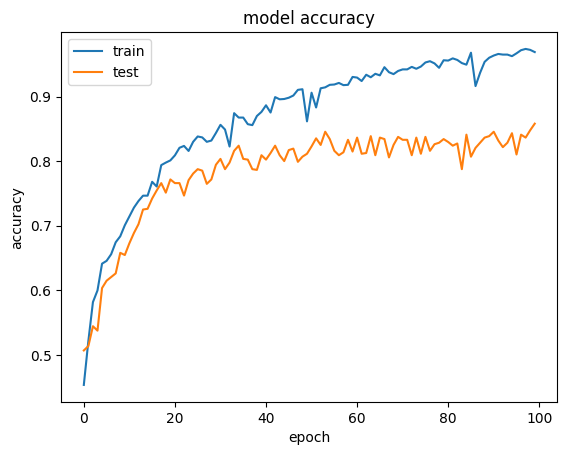
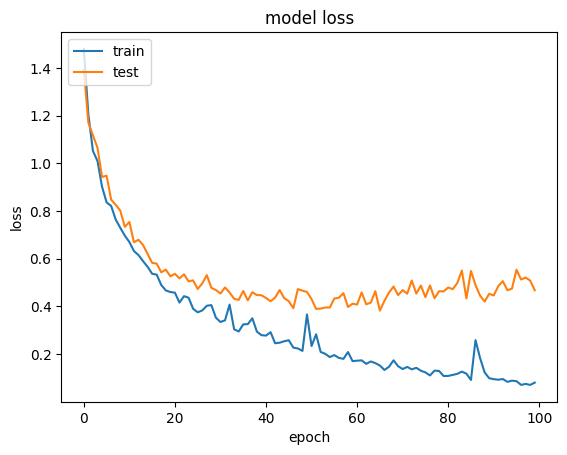

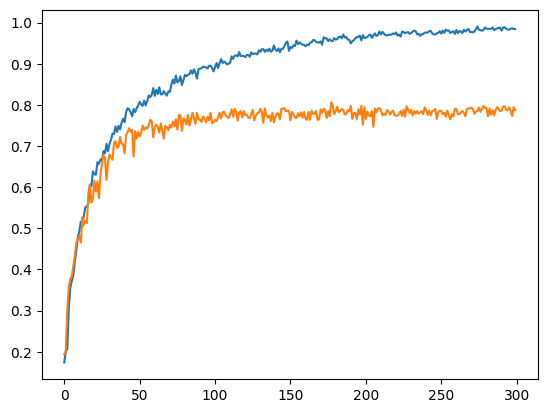

In [29]:
# summarize history for accuracy
history = historyXR
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

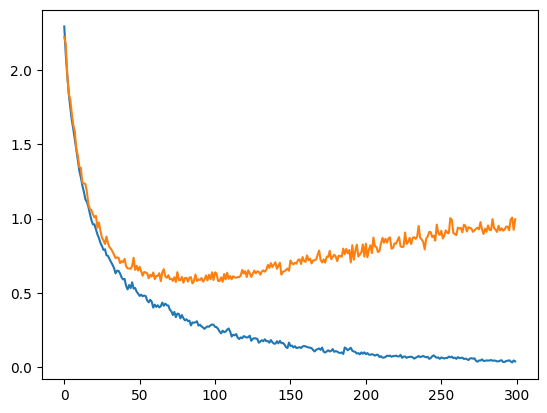

In [30]:
# summarize history for loss
history=historyXR
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

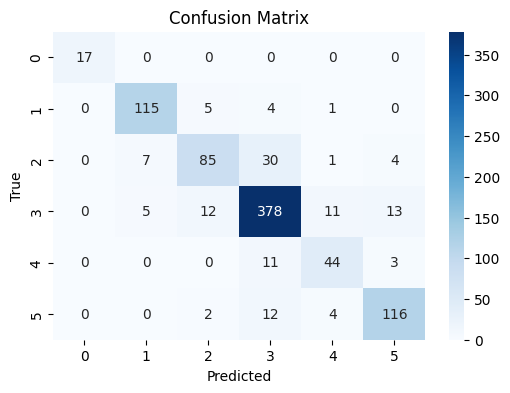

```
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.92      0.91       125
           2       0.82      0.67      0.74       127
           3       0.87      0.90      0.89       419
           4       0.72      0.76      0.74        58
           5       0.85      0.87      0.86       134

    accuracy                           0.86       880
   macro avg       0.86      0.85      0.86       880
weighted avg       0.86      0.86      0.86       880
```

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
----- Classification Report of CNN predict X_test -----
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        79
           1       1.00      0.40      0.57         5
           2       0.46      0.52      0.49        33
           3       0.48      0.60      0.53       116
           4       0.72      0.54      0.62       265
           5       0.57      0.49      0.52       123
           6       0.65      0.21      0.31        53
           7       0.93      0.43      0.59       123
           8       1.00      0.22      0.36        18
           9       0.86      0.52      0.65       124

   micro avg       0.68      0.52      0.59       939
   macro avg       0.75      0.48      0.55       939
weighted avg       0.72      0.52      0.59       939
 samples avg       0.43      0.52      0.46       939

----- Confusion matrix of CNN predict X_test -----
[[ 77   0   0   0   0   1   0   1   0   0

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

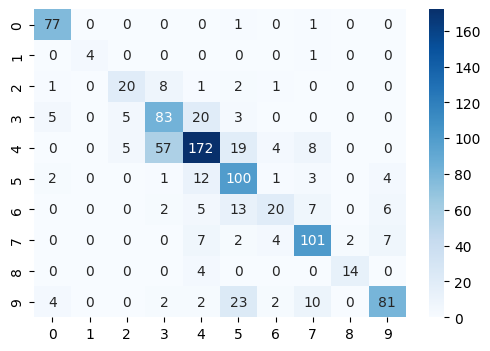

In [31]:

CNN_pred = model.predict(XR_test)
print('----- Classification Report of CNN predict X_test -----')
print(classification_report(yR_test.astype('int').values, CNN_pred.astype('int')))
print('----- Confusion matrix of CNN predict X_test -----')
cm = confusion_matrix(yR_test.astype('int').values.argmax(axis=1), CNN_pred.argmax(axis=1))

print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

### **Transpose data (XT)**

In [32]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, HeartH

X = df_feature_SMA

XT = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # X sliding windows X[i: i+]
    feature = np.array(df_feature_SMA[i:i+slidingW])
    # feature transpose
    featureT = np.transpose(feature)
    # reshape to 3D with channel las=1
    featureT = featureT.reshape(n_feature, slidingW, 1)
    # label sliding windows = df_label[i:i+slidingW]
    label = np.array(df_label[i:i+slidingW])
    # Majority vote labels using mode() #whole array
    mode_values, countL = stats.mode(label, axis=None)
    label = mode_values
    
    XT.append(featureT)
    y.append(label)

XT = np.array(XT)
yT = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yT
y = pd.get_dummies(yT['Sleep_Label'])
yT = y

In [33]:
XT
yT

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3124,False,False,False,False,False,False,False,False,False,True
3125,False,False,False,False,False,False,False,False,False,True
3126,False,False,False,False,False,False,False,False,False,True
3127,False,False,False,False,False,False,False,False,False,True


##### **Train Test Split (XT)**

In [34]:
#----- CNN with XT -----------
#--- Train - Validate - Test ----
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size=0.3,random_state=42)

##### **CNN Architecture (XT)**

In [35]:
CNN_L1 = 16
CNN_L2 = 64
CNN_L3 = 128
Ker_size = (3,3)
Act_func = "relu"
Dense_size = 512
Nclass = yT.shape
print(Nclass)

Input_shape = (n_feature, slidingW, 1)
P_size = (1,2)

model = Sequential()

#Conv layer#1
model.add(Conv2D(CNN_L1, kernel_size=Ker_size, activation=Act_func, input_shape=Input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=P_size))
model.add(Dropout(0.4))

#Conv layer#2
model.add(Conv2D(CNN_L2, kernel_size=Ker_size, activation=Act_func, padding='same'))
model.add(MaxPooling2D(pool_size=P_size))
model.add(Dropout(0.4))

#Conv layer#2
model.add(Conv2D(CNN_L3, kernel_size=Ker_size, activation=Act_func, padding='same'))

# Flatten: Convert to 1D vector
model.add(Flatten())

# Dense (NN) Layer#3
model.add(Dense(Dense_size, activation=Act_func))

# Dense (NN) Layers#4
model.add(Dense(Nclass[1], activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss= tf.keras.losses.categorical_crossentropy, metrics=["acc"])
model.summary()

(3129, 10)


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 4, 100, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 50, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 50, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 50, 64)      │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 25, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 25, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 25, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,642,538 (25.34 MB)

 Trainable params: 6,642,538 (25.34 MB)

 Non-trainable params: 0 (0.00 B)

##### **Train CNN (XT)**

In [36]:
historyXT = model.fit(XT_train, yT_train, epochs=300, batch_size=400, validation_data=(XT_test, yT_test))

Epoch 1/300


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - acc: 0.1525 - loss: 2.5627 - val_acc: 0.1704 - val_loss: 2.2428
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 0.1815 - loss: 2.2140 - val_acc: 0.2002 - val_loss: 2.2530
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.2126 - loss: 2.2014 - val_acc: 0.2311 - val_loss: 2.1338
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 0.2117 - loss: 2.0433 - val_acc: 0.3429 - val_loss: 1.8803
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - acc: 0.3221 - loss: 1.8584 - val_acc: 0.3429 - val_loss: 1.7775
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - acc: 0.3237 - loss: 1.7707

KeyboardInterrupt: 

##### **CNN Performance (XT)**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

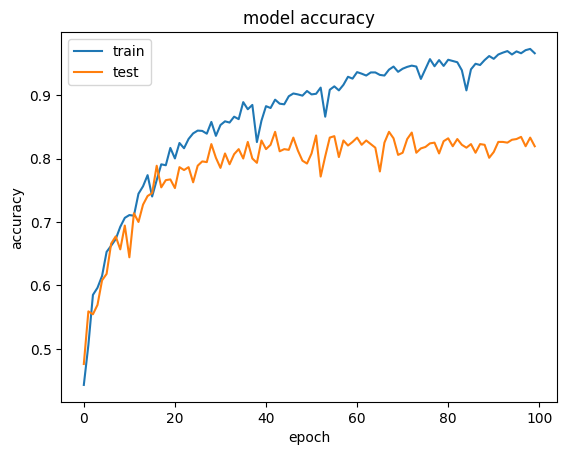
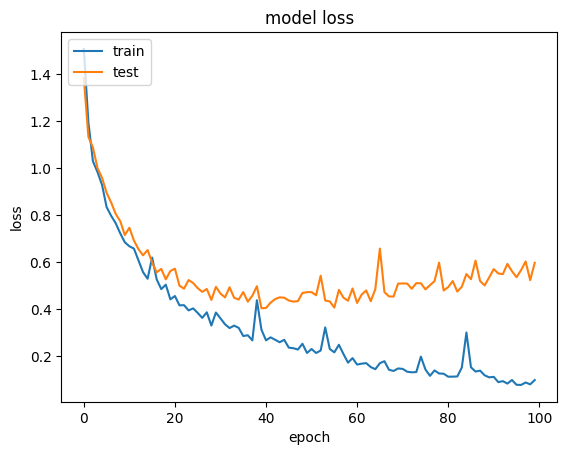

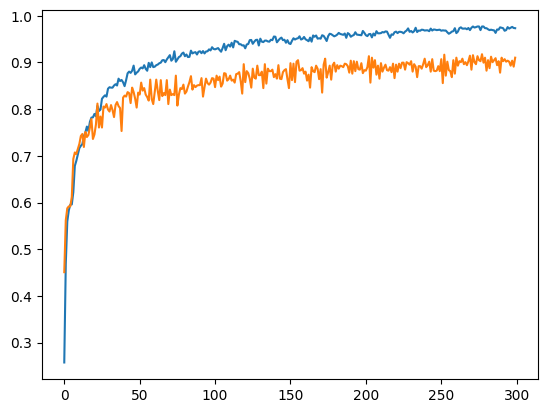

In [ ]:
# summarize history for accuracy
history = historyXT
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

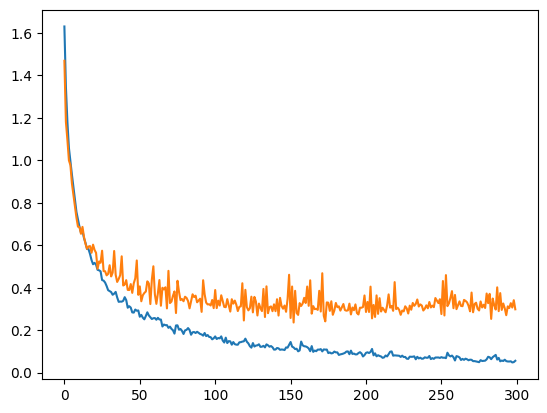

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

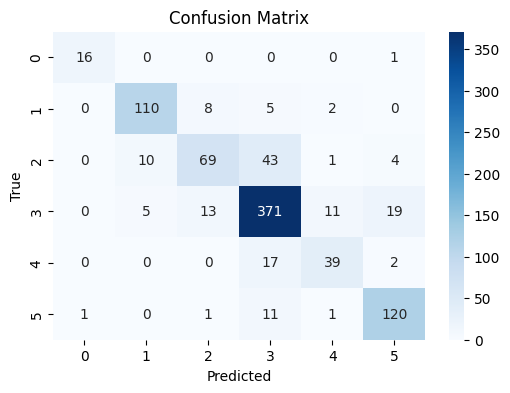

```
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.88      0.88       125
           2       0.76      0.54      0.63       127
           3       0.83      0.89      0.86       419
           4       0.72      0.67      0.70        58
           5       0.82      0.90      0.86       134

    accuracy                           0.82       880
   macro avg       0.83      0.80      0.81       880
weighted avg       0.82      0.82      0.82       880
```

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
----- Classification Report of CNN predict X_test -----
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        91
           1       0.85      0.27      0.41       146
           2       0.97      0.18      0.31       425
           3       0.00      0.00      0.00        17
           4       1.00      0.32      0.48       257

   micro avg       0.97      0.27      0.42       936
   macro avg       0.76      0.28      0.39       936
weighted avg       0.95      0.27      0.41       936
 samples avg       0.27      0.27      0.27       936

----- Confusion matrix of CNN predict X_test -----
[[ 85   1   5   0   0]
 [  1 119  23   0   3]
 [  2  26 389   4   4]
 [  0   0   1  16   0]
 [  1   2  10   0 244]]


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

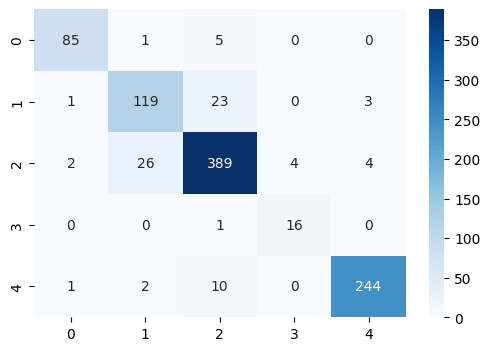

In [ ]:
CNN_pred = model.predict(XT_test)

print('----- Classification Report of CNN predict X_test -----')
print(classification_report(yT_test.astype('int').values, CNN_pred.astype('int')))
print('----- Confusion matrix of CNN predict X_test -----')
cm = confusion_matrix(yT_test.astype('int').values.argmax(axis=1), CNN_pred.argmax(axis=1))
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

### **Long Short Term Memory (LSTM)**

**Train-Test Data Preparation**
LSTM Use data XR, XT same as CNN

##### **Prepare (XR) Data**

In [ ]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, 

X = df_feature_SMA

XR = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # sliding window X[i: i+slidingW]
    feature = np.array(df_feature_SMA[i: i+slidingW])
    # Reshape 2D Array to 3D Array with channel last
    featureR = feature.reshape(slidingW, n_feature, 1)  
    # sliding window df_labels[i: i+slidingW]
    label = np.array(df_label[i: i+slidingW])
    # Majority vote : mode of labels for whole array 
    mode_values, countL = stats.mode(label,axis=None) 
    label = mode_values
    
    XR.append(featureR)
    y.append(label)

XR = np.array(XR)
yR = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yR
y = pd.get_dummies(yR['Sleep_Label'])
yR = y

In [ ]:
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.3,random_state=42)

##### **LSTM (XR) Model Architecture**

In [ ]:
#LSTM 2 Layers
#Nodes = [50, 100, 150, 200, 250, 300, 400, 500, 1000]
n_hidden1 = 100
n_hidden2 = 50

Nclass = yR.shape
Input_shape = (slidingW, n_feature)

model = Sequential()
model.add(LSTM(n_hidden1, return_sequences=True, input_shape=Input_shape))
model.add(Dropout(0.25))

model.add(LSTM(n_hidden2))
model.add(Dropout(0.5))
model.add(Dense(Nclass[1], activation='softmax'))
model.summary()

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 100)       │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,455 (283.03 KB)

 Trainable params: 72,455 (283.03 KB)

 Non-trainable params: 0 (0.00 B)

**Training Parameters (optimizer)**

In [ ]:
# Compiling the model
#adam = optimizers.Adam(learning_rate=0.001)
adam = 'adam'
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

##### **Training LSTM (XR) Model**

In [ ]:
# Training the model
EP = 300
batch_size = 400

historyL_XR = model.fit(XR_train, yR_train, epochs=EP, batch_size=batch_size, validation_data=(XR_test, yR_test))

Epoch 1/300


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 591ms/step - accuracy: 0.2992 - loss: 1.5766 - val_accuracy: 0.5780 - val_loss: 1.4063
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.5654 - loss: 1.3602 - val_accuracy: 0.5780 - val_loss: 1.1743
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.5723 - loss: 1.2120 - val_accuracy: 0.5962 - val_loss: 1.0745
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.5624 - loss: 1.1505 - val_accuracy: 0.6165 - val_loss: 1.0617
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - accuracy: 0.5420 - loss: 1.1207 - val_accuracy: 0.5951 - val_loss: 1.0112
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - accuracy: 0.5854 - loss: 1.0913 - val_accuracy: 0.6293 - val_loss: 0.9726
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.6026 - loss: 1.0235 - val_accuracy: 0.6442 - val_loss: 0.9447
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.6024 - loss: 1.0152 - val_accuracy: 0.6111 - val_loss: 0.9

 **LSTM (XR) Model Performance**

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

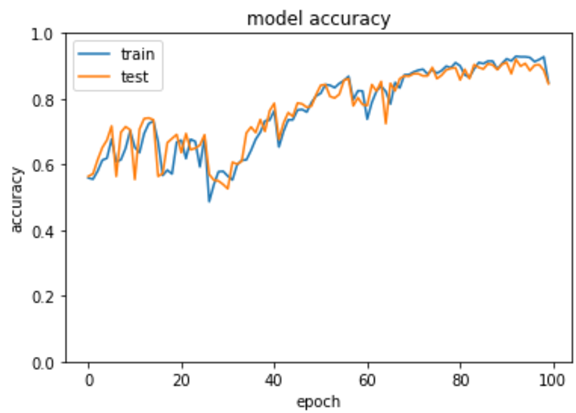

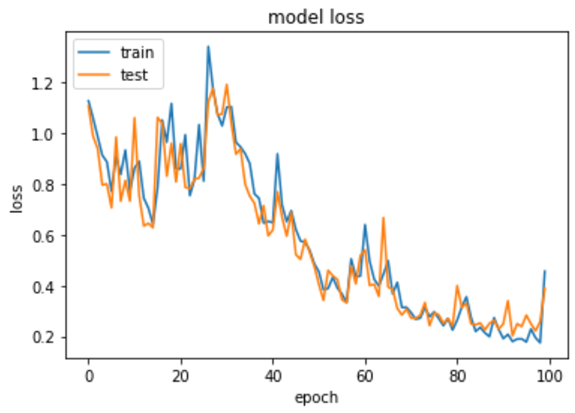

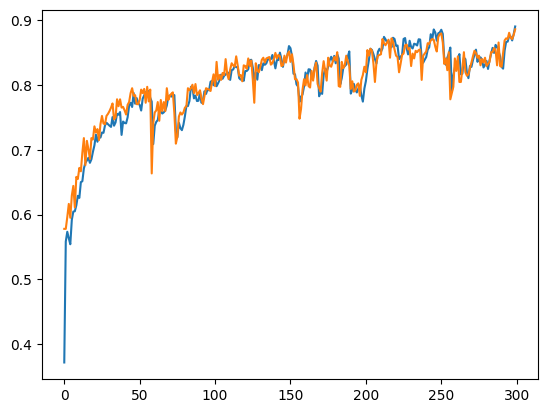

In [ ]:
# summarize history for accuracy
history = historyL_XR
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


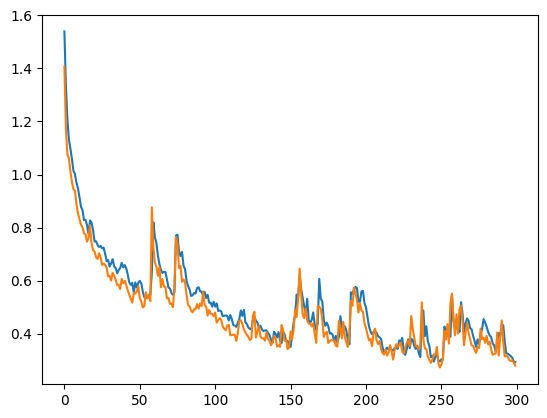

In [ ]:
# summarize history for loss
history = historyL_XR
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

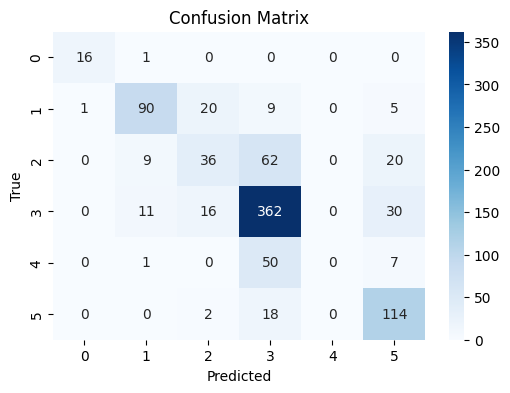

```
             precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.80      0.72      0.76       125
           2       0.49      0.28      0.36       127
           3       0.72      0.86      0.79       419
           4       0.00      0.00      0.00        58
           5       0.65      0.85      0.74       134

    accuracy                           0.70       880
   macro avg       0.60      0.61      0.60       880
weighted avg       0.65      0.70      0.66       880

```

 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
----- Classification Report of CNN predict X_test -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00       146
           2       0.00      0.00      0.00       425
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00       257

   micro avg       0.00      0.00      0.00       936
   macro avg       0.00      0.00      0.00       936
weighted avg       0.00      0.00      0.00       936
 samples avg       0.00      0.00      0.00       936

----- Confusion matrix of CNN predict X_test -----
[[ 86   1   2   0   2]
 [  0 107  33   0   6]
 [  1  33 373   4  14]
 [  0   0   2  15   0]
 [  3   2   4   0 248]]


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

<Axes: >

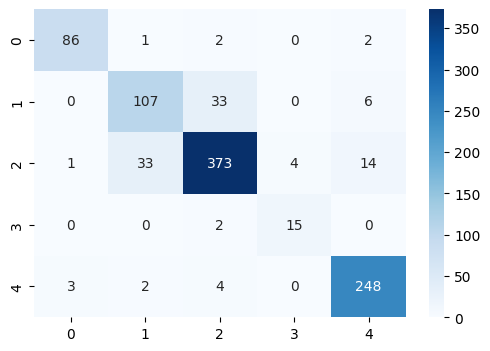

In [ ]:
LSTM_pred = model.predict(XR_test)

print('----- Classification Report of CNN predict X_test -----')
print(classification_report(yR_test.astype('int').values, LSTM_pred.astype('int')))
cm = confusion_matrix(yR_test.astype('int').values.argmax(axis=1), LSTM_pred.argmax(axis=1))
print('----- Confusion matrix of CNN predict X_test -----')
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

##### **Prepare (XT) Data**

In [ ]:
slidingW = 100
stride_step = 10
n_feature = 4 # accX, accY, accZ, HeartH

X = df_feature_SMA[:30000]

XT = []
y = []
for i in range(0, len(X)-slidingW, stride_step):
    # X sliding windows X[i: i+]
    feature = np.array(df_feature_SMA[i:i+slidingW])
    # feature transpose
    featureT = np.transpose(feature)
    # reshape to 3D with channel las=1
    featureT = featureT.reshape(n_feature, slidingW, 1)
    # label sliding windows = df_label[i:i+slidingW]
    label = np.array(df_label[i:i+slidingW])
    # Majority vote labels using mode() #whole array
    mode_values, countL = stats.mode(label, axis=None)
    label = mode_values
    
    XT.append(featureT)
    y.append(label)

XT = np.array(XT)
yT = pd.DataFrame(np.array(y).ravel(),columns=['Sleep_Label'])
# one hot encoding yT
y = pd.get_dummies(yT['Sleep_Label'])
yT = y

In [ ]:
#----- LSTM with XT -----------
#--- Train - Validate - Test ----
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size=0.3,random_state=42)

##### **Create LSTM (XT) Model Architecture**

In [ ]:
#LSTM 2 Layers
#Nodes = [50, 100, 150, 200, 250, 300, 400, 500, 1000]
n_hidden1 = 100
n_hidden2 = 50
pv1 = 0.25
pv2 = 0.5

Nclass = yT.shape
Input_shape = (n_feature, slidingW)
print(Input_shape)

model = Sequential()
model.add(LSTM(n_hidden1, return_sequences=True, input_shape=Input_shape))
model.add(Dropout(pv1))

model.add(LSTM(n_hidden2))
model.add(Dropout(pv2))
model.add(Dense(Nclass[1], activation='softmax'))
model.summary()

(4, 100)


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 4, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,855 (433.03 KB)

 Trainable params: 110,855 (433.03 KB)

 Non-trainable params: 0 (0.00 B)

**Training Parameters (optimizer)**

In [ ]:

adam = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# Training the model
EP = 300
batch_size = 400

historyL_XT = model.fit(XT_train, yT_train, epochs=EP,
                        batch_size=batch_size, validation_data=(XT_test, yT_test))

Epoch 1/300


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.3015 - loss: 1.5602 - val_accuracy: 0.5139 - val_loss: 1.4301
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4517 - loss: 1.4201 - val_accuracy: 0.5072 - val_loss: 1.3129
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4748 - loss: 1.3267 - val_accuracy: 0.5072 - val_loss: 1.2455
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4863 - loss: 1.2818 - val_accuracy: 0.5474 - val_loss: 1.2057
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5117 - loss: 1.2380 - val_accuracy: 0.5608 - val_loss: 1.1742
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5373 - loss: 1.2148 - val_accuracy: 0.5920 - val_loss: 1.1326
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5633 - loss: 1.1663 - val_accuracy: 0.5808 - val_loss: 1.0989
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5796 - loss: 1.1274 - val_accuracy: 0.5786 - val_loss: 1.0638
Epo

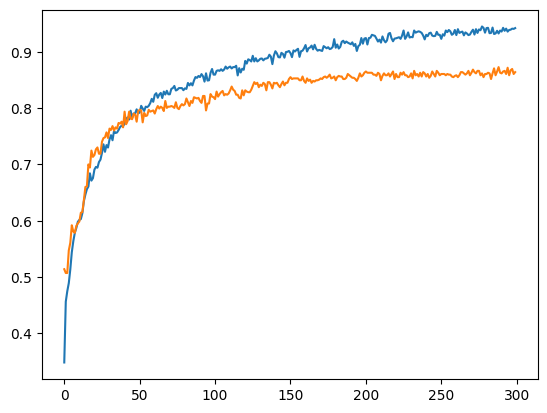

In [ ]:
# summarize history for accuracy
history = historyL_XT
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

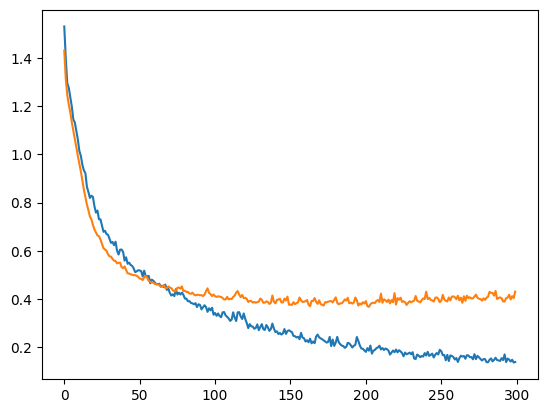

In [ ]:
# summarize history for loss
history = historyL_XT
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
(897, 5)
----- Classification Report of CNN predict X_test -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.00      0.00      0.00       146
           2       0.00      0.00      0.00       440
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00       200

   micro avg       0.00      0.00      0.00       897
   macro avg       0.00      0.00      0.00       897
weighted avg       0.00      0.00      0.00       897
 samples avg       0.00      0.00      0.00       897

----- Confusion matrix of CNN predict X_test -----
[[ 80   6   1   0   5]
 [  0  99  40   0   7]
 [  2  20 399   4  15]
 [  0   0   2  17   0]
 [  3   2  15   0 180]]


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

<Axes: >

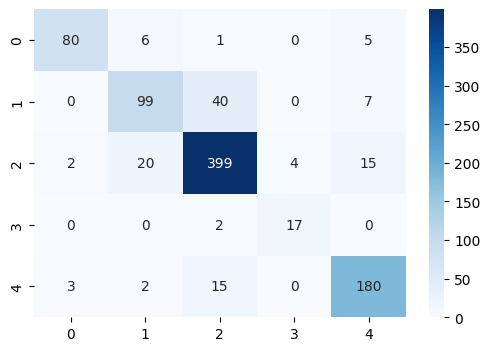

In [ ]:
LSTM_pred = model.predict(XT_test)
print(LSTM_pred.shape)

print('----- Classification Report of CNN predict X_test -----')
print(classification_report(yT_test.astype('int').values, LSTM_pred.astype('int')))
print('----- Confusion matrix of CNN predict X_test -----')
cm = confusion_matrix(yT_test.astype('int').values.argmax(axis=1), LSTM_pred.argmax(axis=1))
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')